<a href="https://colab.research.google.com/github/Annieng184/Annieng184/blob/main/Project_2_Singapore_Airbnb_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import math

get data here https://drive.google.com/file/d/1OZJj12YBIZzMwUekJUK_33gyyf8lKTJQ/view?usp=sharing

In [31]:
#upload file
uploaded = files.upload()

Saving Airbnb_Singapore.csv to Airbnb_Singapore (2).csv


In [32]:
#read csv file
df = pd.read_csv('Airbnb_Singapore.csv')
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33432,103.78521,Private room,80,92,18,2014-12-26,0.19,1,365,0,NaN
1,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34537,103.95887,Private room,179,92,20,2020-01-17,0.16,6,365,0,NaN
2,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34754,103.95958,Private room,81,92,24,2019-10-13,0.18,6,365,0,NaN
3,71903,Room 2-near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34531,103.96100,Private room,81,92,47,2020-01-09,0.35,6,365,0,NaN
4,275343,"Conveniently located City Room!(1,2,3,4,5,6,7,8)",1439258,Joyce,Central Region,Bukit Merah,1.29015,103.80814,Private room,52,14,20,2020-04-17,0.18,26,317,0,S0399


In [33]:
len(df)

3206

In [34]:
#drop irrelevant columns(latitude, longtitude, last review, number_of_reviews_1tm, reviews_per_month, name)
df = df.drop(['latitude','longitude','last_review', 'number_of_reviews_ltm','reviews_per_month','name'], axis = 1)


In [35]:
df.head()

,id,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,license
0,50646,227796,Sujatha,Central Region,Bukit Timah,Private room,80,92,18,1,365,NaN
1,71609,367042,Belinda,East Region,Tampines,Private room,179,92,20,6,365,NaN
2,71896,367042,Belinda,East Region,Tampines,Private room,81,92,24,6,365,NaN
3,71903,367042,Belinda,East Region,Tampines,Private room,81,92,47,6,365,NaN
4,275343,1439258,Joyce,Central Region,Bukit Merah,Private room,52,14,20,26,317,S0399


Brainstorm some questions 



In [36]:
#I/ Short questions (Avg price, Avg nights booked, room type, market share by neighbourhood, 

#II/ Long questions
   #1/ Market share by regions
   #3/ Host lising count
   #4/ Top host according to booking times and host_listing_count
   #5/ Best room type for sales
   #6/ Avg price of each room type
   #6/ Host with highest sales, contribution to sales

In [37]:
df['price'].mean() #avg price
df['price'].max()

10286

In [38]:
df['minimum_nights'].mean() #avg night booked

76.98440424204617

In [39]:
print(set(df['room_type'])) #list out room types

{'Entire home/apt', 'Hotel room', 'Private room', 'Shared room'}


In [40]:
print(set(df['neighbourhood_group'])) #list out regions

{'West Region', 'North-East Region', 'East Region', 'Central Region', 'North Region'}


Question 1: What was the best room type for sales?



In [41]:
df.head()

,id,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,license
0,50646,227796,Sujatha,Central Region,Bukit Timah,Private room,80,92,18,1,365,NaN
1,71609,367042,Belinda,East Region,Tampines,Private room,179,92,20,6,365,NaN
2,71896,367042,Belinda,East Region,Tampines,Private room,81,92,24,6,365,NaN
3,71903,367042,Belinda,East Region,Tampines,Private room,81,92,47,6,365,NaN
4,275343,1439258,Joyce,Central Region,Bukit Merah,Private room,52,14,20,26,317,S0399


In [42]:
#create Sales column by multiplying price and minimum_nights (make sure both of them converted to int)
print(df['price'].dtypes)
print(df['minimum_nights'].dtypes)

int64
int64


In [43]:
#create Sales column by multiplying price and minimum_nights (make sure both of them converted to int)
df['Sales'] = df['price'] * df['minimum_nights']

In [44]:
#move Sales column next to Price Each for better look
moving_column = df.pop('Sales')
df.insert(8, 'Sales', moving_column)

In [45]:
df.head()

,id,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,Sales,number_of_reviews,calculated_host_listings_count,availability_365,license
0,50646,227796,Sujatha,Central Region,Bukit Timah,Private room,80,92,7360,18,1,365,NaN
1,71609,367042,Belinda,East Region,Tampines,Private room,179,92,16468,20,6,365,NaN
2,71896,367042,Belinda,East Region,Tampines,Private room,81,92,7452,24,6,365,NaN
3,71903,367042,Belinda,East Region,Tampines,Private room,81,92,7452,47,6,365,NaN
4,275343,1439258,Joyce,Central Region,Bukit Merah,Private room,52,14,728,20,26,317,S0399


In [46]:
#count values of room types
print(df['room_type'].value_counts())
roomtype_count = df['room_type'].value_counts()

Entire home/apt    1497
Private room       1462
Hotel room          133
Shared room         114
Name: room_type, dtype: int64


In [47]:
#count sales values of room types
print(df.groupby('room_type').sum()['Sales'])
roomtype_sale = df.groupby('room_type').sum()['Sales']
roomtype_sale = roomtype_sale.astype(int)


room_type
Entire home/apt    28566215.0
Hotel room          1678550.0
Private room       15065980.0
Shared room         1084846.0
Name: Sales, dtype: float64


In [62]:
room = df['room_type'].unique()
sns.set_theme()

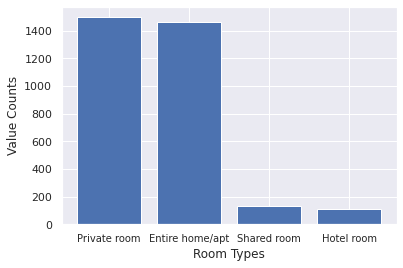

In [63]:
plt.bar(x = room, height = roomtype_count)
plt.xticks(room, size = 10)
plt.xlabel('Room Types')
plt.ylabel('Value Counts', )
plt.show()